In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
n=3
eta=1
eps=.01
C1=np.random.randn(n,n)
C=np.abs(C1-C1.transpose())
U=np.random.randn(n,n)

array([[0.        , 0.36575022, 0.91836372],
       [0.36575022, 0.        , 0.04102469],
       [0.91836372, 0.04102469, 0.        ]])

In [68]:
def g(U):
    return 1/(1+np.exp(-U))

def g_inv(x):
    return np.log(x/(1-x))

def theta(n):
    return 2*np.ones([n,n])

def diag(U):
    n=len(U)
    newU=[]
    for i in range(n):
        for j in range(n):
            if i==j:
                newU.append(U[i][j])
            else:
                newU.append(0)
    return np.array(newU).reshape(n,n)

def constraint(x):
    col=sum(x)
    row=sum(x.transpose())
    col_arr=np.vstack([col for _ in range(len(x))])
    row_arr=np.vstack([row for _ in range(len(x))])
    return col_arr+row_arr - theta(len(x))

In [54]:
def timestep(U,C,eta,kd,t,eps):
    n=len(U)
    cons=constraint(g(U))
    con=sum(sum(cons))
    return U-eps*(eta*cons-C*np.exp(-t)-kd*diag(U)),con

def evolve(U,C,eta,kd,N,eps):
    
    t=0
    cons=[]
    for i in range(N):

        U=timestep(U,C,eta,kd,t,eps)[0]
        con=timestep(U,C,eta,kd,t,eps)[1]
        cons.append(con)
        t+=eps
    return g(U),cons

In [55]:
def mth_biggest(U,m):
    return sorted(U.reshape(-1),reverse=True)[m-1]

def index_mth(U,m):
    ind=list(U.reshape(-1)).index(mth_biggest(U,m))
    i=ind//len(U)
    j=ind%len(U)
    return i,j

def get_xbar(U,m):
    i,j=index_mth(U,m)
    x1=0
    x2=0
    for k in range(len(U)):
        x1+=U[i,k]
        x2+=U[k,j]
    return (x1+x2)/2

In [64]:

#wta = 'winner takes all'

def wta(U,m):
    Uwta=[]
    a,b=index_mth(U,m)
    for i in range(len(U)):
        row=[]
        for j in range(len(U)):
            if i==a and j==b:
                row.append(get_xbar(U,m))
            elif i==a and j!=b:
                row.append(0)
            elif i!=a and j==b:
                row.append(0)
            else:
                row.append(U[i,j])
        Uwta.append(row)
    return np.array(Uwta)
        
    
def wta_full(U):
    for m in range(1,len(U)+1):
        U=wta(U,m)
    return U

In [70]:
x_fin,con=evolve(U,C,eta,0,10003,.01)

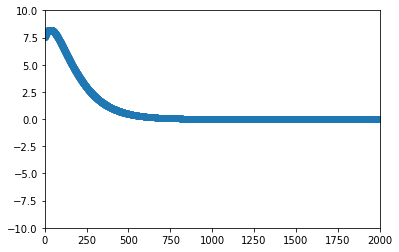

In [71]:
plt.scatter(range(len(con)),con)
plt.ylim(-10,10)
plt.xlim(0,2000)
plt.show()

In [63]:
sum(sum(constraint(x_fin)))

7.327471962526033e-15

In [72]:
wta_full(x_fin)

array([[0.        , 0.        , 0.29632121],
       [0.89451199, 0.        , 0.        ],
       [0.        , 1.09765141, 0.        ]])